# Markov Chain Monte Carlo
### Extra Credit Project: Derived Python version from Matlab
#### Vindhya Kuchibhotla 

### 1. Gibbs Sampling

In [2]:
from scipy.stats import binom, poisson
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(threshold=np.inf)

mu_x = 0
mu_y = 0

p = np.zeros( (10, 10) )
for x in range(1,11):
        for y in range(1,11):
                z = poisson.pmf(x, y/2 + 1)
                
                x1 = poisson.pmf(range(0,101), y/2 + 1)
                
                y1 = 2 + np.array(range(0, 101))
                y2 = 10 + np.array(range(0, 101))
                
                x2 = binom.pmf(y, 10, np.true_divide(y1, y2))
                
                s = sum(np.true_divide(x1, x2))
                p[x-1][y-1]= z/s
                
                mu_x = mu_x+x*p[x-1][y-1]
                mu_y = mu_y+y*p[x-1][y-1]
                
print(p[2][3])
print(p[0][0])
print(mu_x)
print(mu_y)

0.045842584801012276
0.028963338044944192
2.508195991480612
3.021669691406343


In [3]:
z = poisson.pmf(4, 4/2 + 1)
        
x1 = poisson.pmf(range(0,101), 4/2 + 1)
               
y1 = 2 + np.array(range(0, 101))
y2 = 10 + np.array(range(0, 101))
                
x2 = binom.pmf(4, 10, np.true_divide(y1, y2))
                
s = sum(np.true_divide(x1, x2))
print(z/s)

0.034381938600759214


[50  7  2  2  1  2  1  3  3  3  4  1  0  1  2  1  1  5  4  1  5  5  2  2
  3  6  8  4  7  2  4  6  1  3  5  4  4  3  2  1  4  4  4  3  2  3  5  1
  3  3  1  3  0  2  1  0  2  4  4  1  2  2  3  2  4  3  0  4  5  1  4  2
  2  2  1  0  0  4  3  1  3  1  1  2  1  1  6  3  3  2  5  2  0  3  6  1
  2  1  2  1]
[10  5  4  3  3  2  4  1  4  2  2  1  1  4  4  4  5  2  3  4  6  7  2  4
  5  9  6  6  6  5  5  2  2  5  4  4  4  4  2  5  6  5  3  5  2  4  7  3
  4  6  2  2  2  2  1  1  3  2  5  5  3  4  3  3  3  2  3  5  4  1  5  4
  5  2  1  2  2  6  3  2  4  1  3  4  3  4  6  2  4  4  4  3  3  6  5  1
  4  2  3  3]
2.6483516483516483
3.5934065934065935


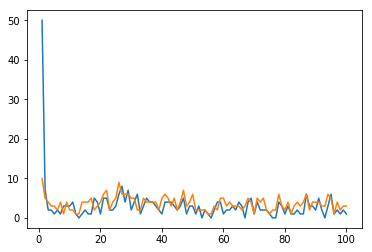

In [55]:
# Estimate p by Gibbs Sampling
from matplotlib import pyplot as plt

x = np.arange(100)
y = np.arange(100)
x[0]=50
y[0]=10
for i in range(1,100):
    x[i]=np.random.poisson(y[i-1]/2+1)
    y[i]=np.random.binomial(10,(2+x[i])/(10+x[i]));

print(x)
print(y)
axis_ints = np.array(range(1, 101))
plt.plot(axis_ints,x,axis_ints,y) 
print(np.mean(x[9:]))
print(np.mean(y[9:]))

### 2. Metropolis Algorithm

In [9]:
x = np.array(range(1, 101))
y = np.array(range(1, 101))

d1 = np.power(x.transpose(),3) * np.ones( len(y) )  + np.power(x.transpose(),2) * np.power(y,2) + np.ones( (len(x.transpose()), 1) ) * np.power(y,3) + 1
a = np.array(np.power(x.transpose(),3))
a.shape = (100,1)
b = np.ones( len(y) )
b.shape = (1,100)
print(a.shape)
print(b.shape)
print(a)
print(b)
print(np.dot(a,b))

#print(np.true_divide(1,d1))

(100, 1)
(1, 100)
[[      1]
 [      8]
 [     27]
 [     64]
 [    125]
 [    216]
 [    343]
 [    512]
 [    729]
 [   1000]
 [   1331]
 [   1728]
 [   2197]
 [   2744]
 [   3375]
 [   4096]
 [   4913]
 [   5832]
 [   6859]
 [   8000]
 [   9261]
 [  10648]
 [  12167]
 [  13824]
 [  15625]
 [  17576]
 [  19683]
 [  21952]
 [  24389]
 [  27000]
 [  29791]
 [  32768]
 [  35937]
 [  39304]
 [  42875]
 [  46656]
 [  50653]
 [  54872]
 [  59319]
 [  64000]
 [  68921]
 [  74088]
 [  79507]
 [  85184]
 [  91125]
 [  97336]
 [ 103823]
 [ 110592]
 [ 117649]
 [ 125000]
 [ 132651]
 [ 140608]
 [ 148877]
 [ 157464]
 [ 166375]
 [ 175616]
 [ 185193]
 [ 195112]
 [ 205379]
 [ 216000]
 [ 226981]
 [ 238328]
 [ 250047]
 [ 262144]
 [ 274625]
 [ 287496]
 [ 300763]
 [ 314432]
 [ 328509]
 [ 343000]
 [ 357911]
 [ 373248]
 [ 389017]
 [ 405224]
 [ 421875]
 [ 438976]
 [ 456533]
 [ 474552]
 [ 493039]
 [ 512000]
 [ 531441]
 [ 551368]
 [ 571787]
 [ 592704]
 [ 614125]
 [ 636056]
 [ 658503]
 [ 681472]
 [ 704969]
 [ 

In [27]:
x = np.array(range(1, 101))
y = np.array(range(1, 101))

a = np.array(np.power(x.transpose(),3))
a.shape = (100,1)
b = np.ones( len(y) )
b.shape = (1,100)
ab = np.dot(a,b)

e = np.array(np.power(x.transpose(),2))
e.shape = (100,1)
f = np.array(np.power(y,2))
f.shape = (1,100)
ef = np.dot(e,f)

c = np.ones( (len(x.transpose()), 1) )
c.shape = (100,1)
d = np.array(np.power(y,3))
d.shape = (1, 100)
cd = np.dot(c,d)

p1 = ab + ef + cd + 1
p = np.true_divide(1,p1)
p = np.true_divide(p, sum(sum(p)))
#print(p)

a = np.array(x.transpose())
a.shape = (100,1)
b = np.ones( len(y) )
b.shape = (1,100)
mu_x = sum(sum(np.dot(a,b) * p))
print(mu_x)

c = np.ones( (len(x.transpose()), 1) )
c.shape = (100,1)
y.shape = (1,100)
mu_y = sum(sum(np.dot(c,y) * p))
print(mu_y)

2.788561231841214
2.7885612318412116


C:\Users\Vindh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

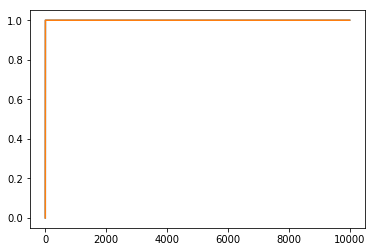

In [38]:
# Estimate p by Gibbs Sampling
from matplotlib import pyplot as plt

x = np.arange(10000)
y = np.arange(10000)
x[0]=0
y[0]=0
for i in range(2,10001):
    qx = abs(x[i-2]+(np.random.binomial(2,.5)-1));
    qy = abs(y[i-2]+(np.random.binomial(2,.5)-1));
    condition = (x[i-2]^3+x[i-2]^2*y[i-2]^2+y[i-2]^3+1)/(qx^3+qx^2*qy^2+qy^3+1)
    if np.random.uniform(0,1) < condition :
        x[i-1]=qx
        y[i-1]=qy
    else:
        x[i-1]=x[i-2]
        y[i-1]=y[i-2]


axis_ints = np.array(range(1, 10001))
plt.plot(axis_ints,x,axis_ints,y) 
#print(np.mean(x))
#print(np.mean(y))